In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\duygu\\Desktop\\görüntü işleme\\5.hafta'

In [3]:
data_path="C:\\Users\\duygu\\Desktop\\görüntü işleme\\4.hafta"
train_data = np.loadtxt(data_path + "//mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "//mnist_test.csv", delimiter=",")

In [4]:
test_data.shape

(10000, 785)

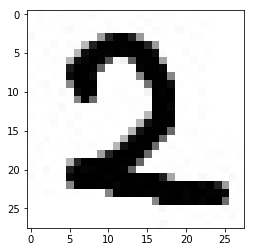

In [5]:
im_1= plt.imread("iki.jpg")
plt.imshow(im_1)

In [6]:
m,n = test_data.shape
m,n

(10000, 785)

In [7]:
def get_my_mean_and_std(k=0,l=0): # k -> class l -> position
    
    try:
    
        s=0  
        t=0
        for i in range(m):
            if(test_data[i,0]==k):
                s=s+1
                t=t+test_data[i,l+1]
        mean_1=(t/(s))

        s,t=0,0
        for i in range(m):                 #varyans değeri
            if(test_data[i,0]==k):
                s=s+1
                diff_1=test_data[i,l+1]-mean_1
                t=t + diff_1*diff_1
        std_1=np.sqrt(t/(s-1))

        #print(mean_1,std_1)
        return mean_1,std_1
    except :
        return(0,0)

get_my_mean_and_std(2,200)

(3.367248062015504, 25.5601800854087)

In [8]:
import math
eps = np.finfo(float).eps
def my_pdf_1(x, mu=0.0, sigma=1.0):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma
my_pdf_1(10,1,3)
#veri setindeki x in olasılığı nedir?

0.001477282803979336

In [9]:
test_data[100,:]

array([  6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 127., 221.,  52.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  64., 229., 219.,
       104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  13., 235., 140.,   4.,   3.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
#oluiturulan resimi 2 boyutlu hale getiriyoruz.

my_t_image = plt.imread('iki.jpg')
a,b,p= my_t_image.shape
my_n_t_image = np.zeros((a,b),dtype=int)

C:\Users\duygu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


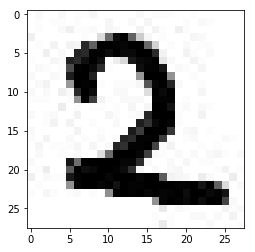

In [11]:
# Yukarıdaki işlemin 2. yolu
for i in range(a):
    for j in range(b):
        s =(int) (my_t_image[i,j,0]+my_t_image[i,j,1]+my_t_image[i,j,2])/3
        my_n_t_image [i,j] =s
plt.imshow(my_n_t_image,cmap='gray')
plt.show()

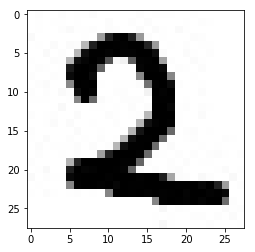

In [12]:
im_gray = my_t_image[:,:,0]
im_gray.shape
plt.imshow(im_gray,cmap="gray")
plt.show()

In [13]:
im_5 = im_gray.reshape(1,784)

import math
for i in range(10):
    my_list =[]
    pdf_t=0
    for j in range(784):
        x=im_5[0,j]
        m_1,std_1 = get_my_mean_and_std(i,j)
        pdf_deger = my_pdf_1(x,m_1,std_1)
        if(math.isnan(pdf_deger)==False):
            pdf_t = pdf_t + pdf_deger
    print(i,pdf_t)
    my_list.append(pdf_t)
    print(pdf_t,i)

C:\Users\duygu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\duygu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\duygu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


0 1.5966988346942514
1.5966988346942514 0
1 2.3892303881890373
2.3892303881890373 1
2 1.1201124018774322
1.1201124018774322 2
3 1.3023083866832361
1.3023083866832361 3
4 3.129180334444455
3.129180334444455 4
5 1.214894882114011
1.214894882114011 5
6 2.141262210168243
2.141262210168243 6
7 7.08920520751286
7.08920520751286 7
8 1.4509308016210811
1.4509308016210811 8
9 2.3347281310126133
2.3347281310126133 9


In [14]:
im_5 = im_gray.reshape(1,784)

import math

def hesapla(im_5):
    
    for i in range(10):
        pdf_t=0
        for j in range(784):
            x=im_5[0,j]
            m_1,std_1 = get_my_mean_and_std(i,j)
            pdf_deger = my_pdf_1(x,m_1,std_1)
            if(math.isnan(pdf_deger)==False):
                pdf_t = pdf_t + pdf_deger
    print(pdf_t)
    my_list.append(pdf_t)
    return my_list

In [17]:
listem = hesapla(im_5)
print(listem)

C:\Users\duygu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\duygu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\duygu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


2.3347281310126133
[2.3347281310126133, 2.3347281310126133, 2.3347281310126133]


In [16]:

print(max(listem))

2.3347281310126133
